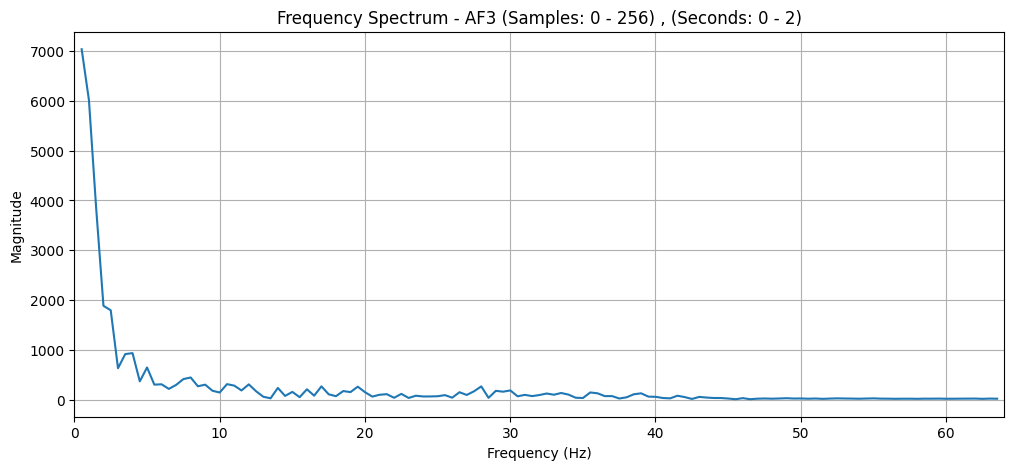

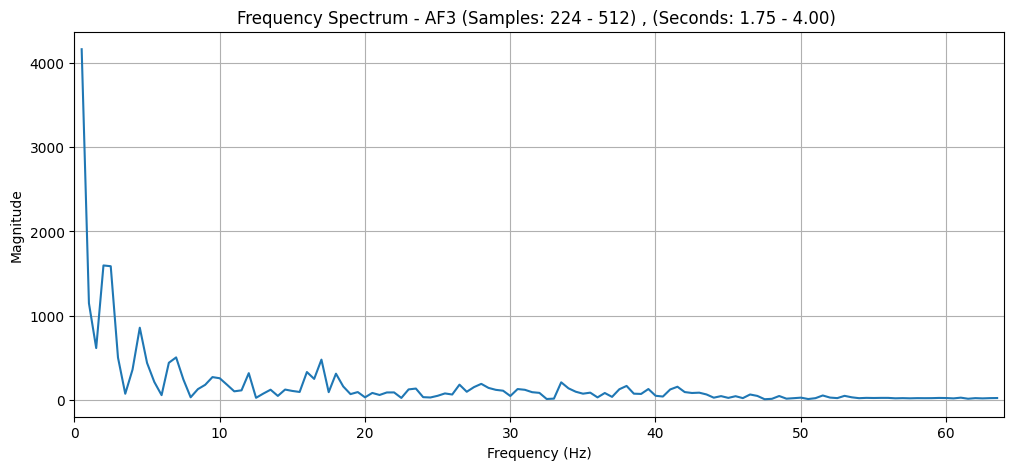

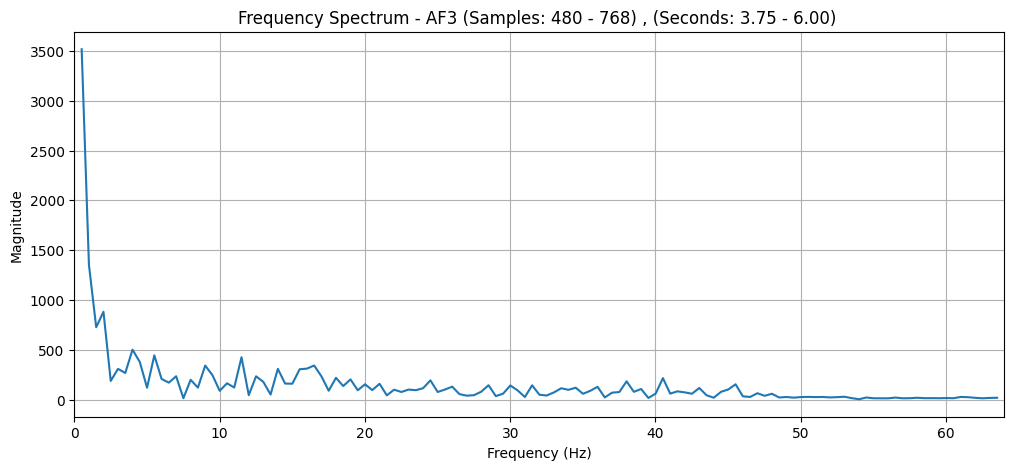

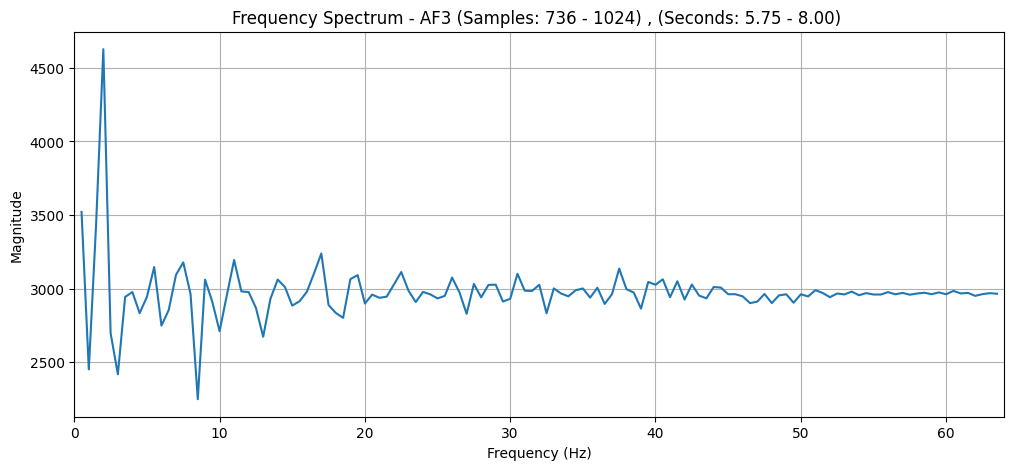

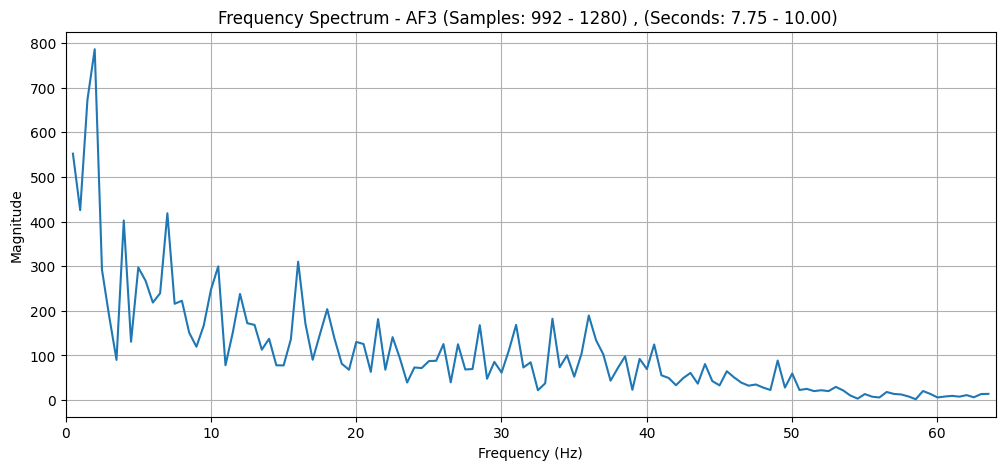

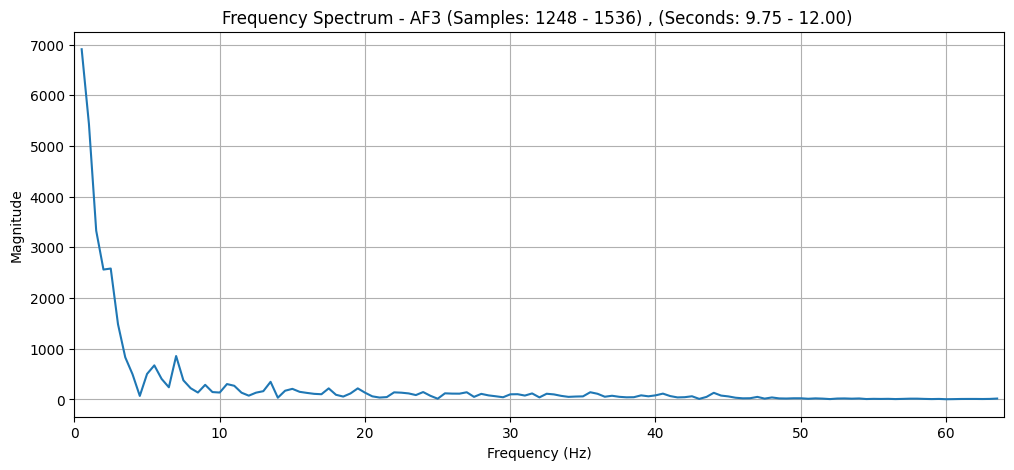

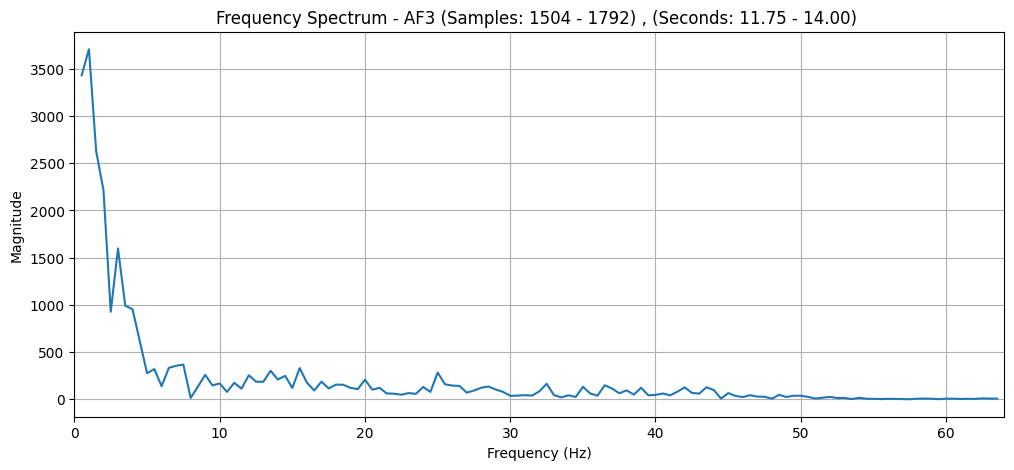

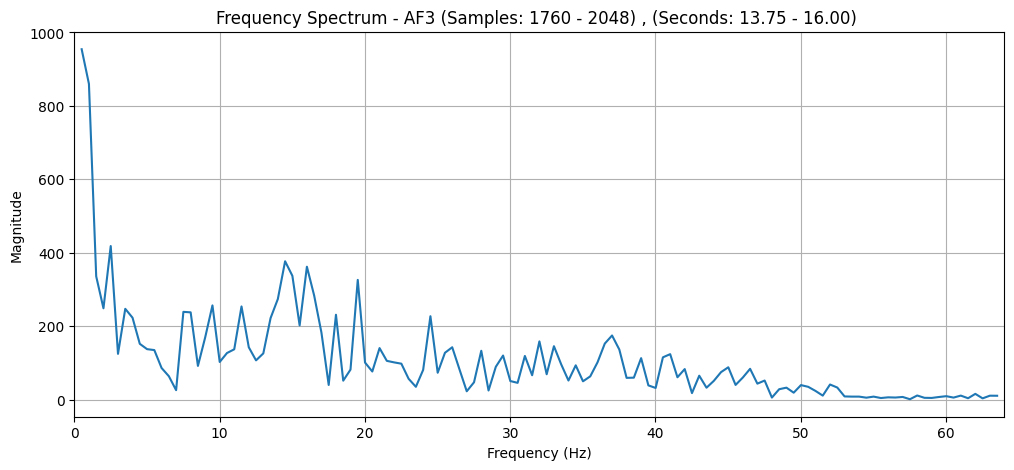

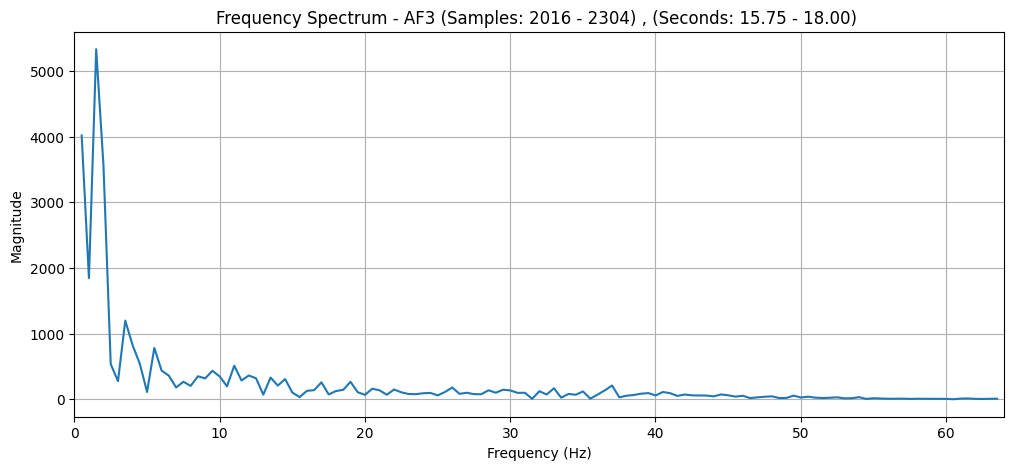

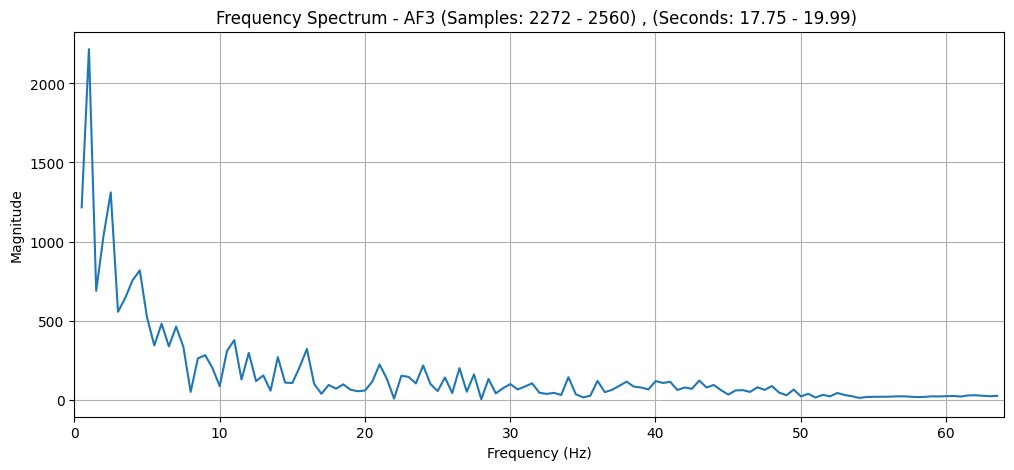

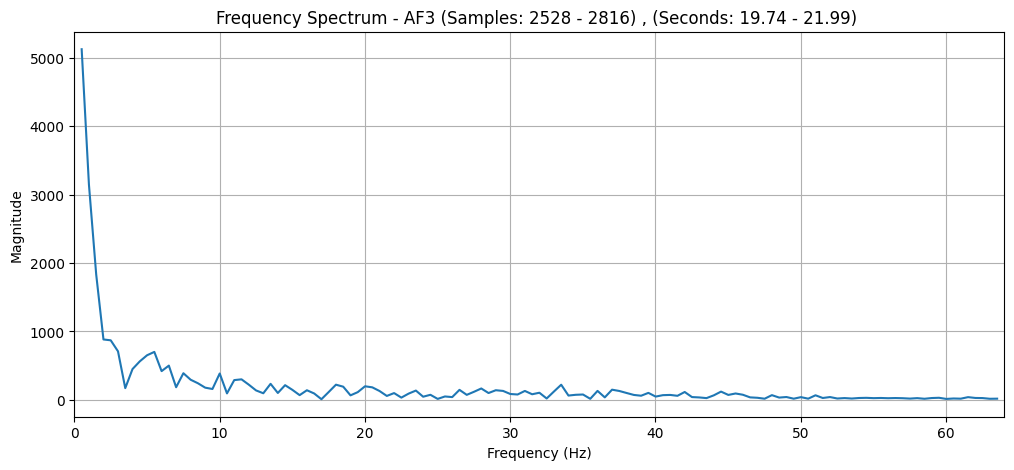

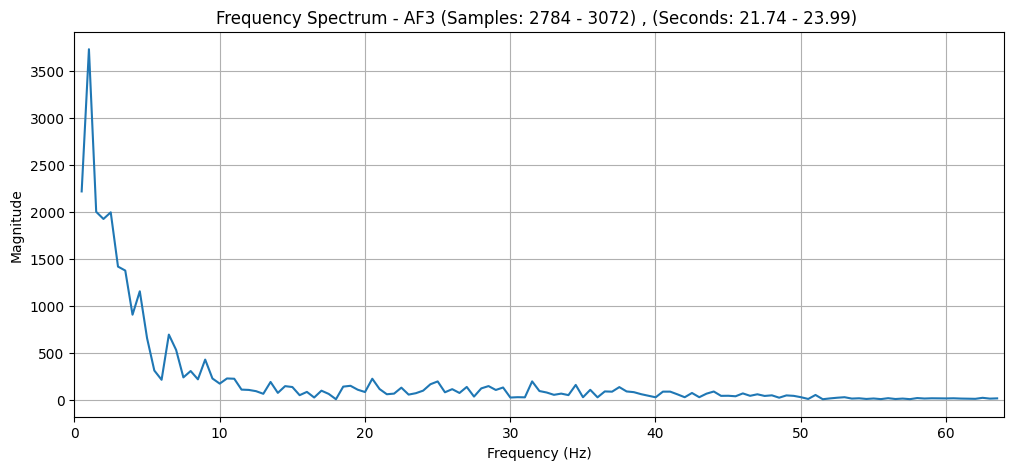

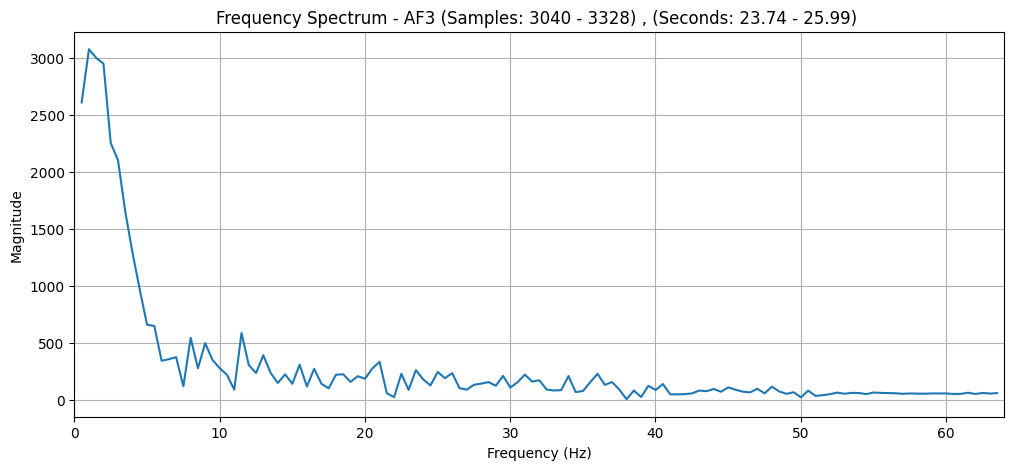

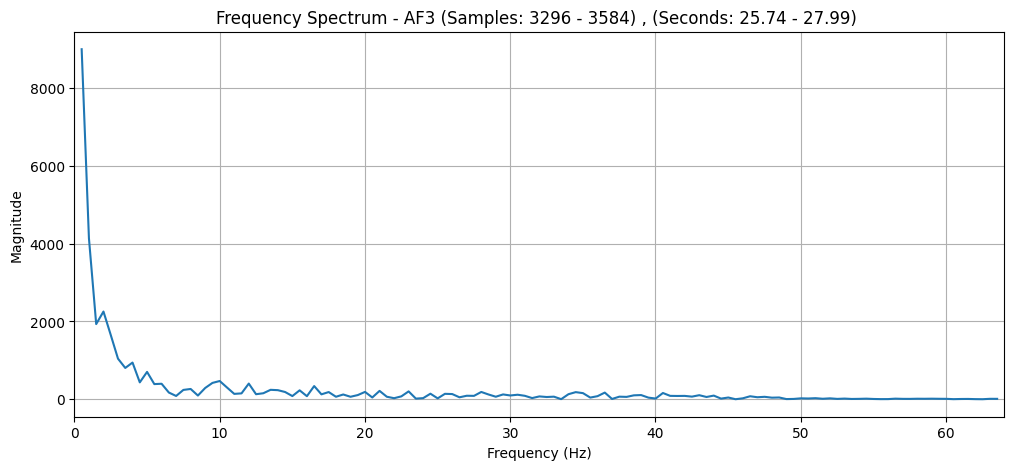

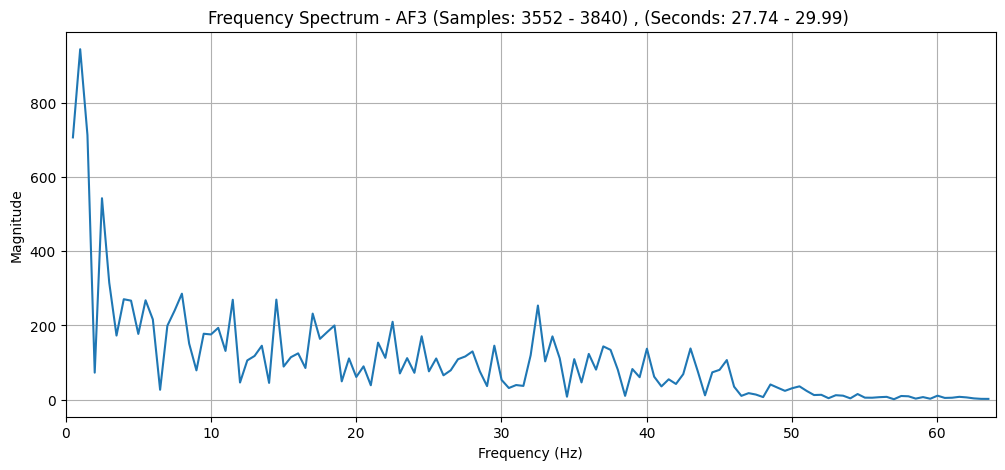

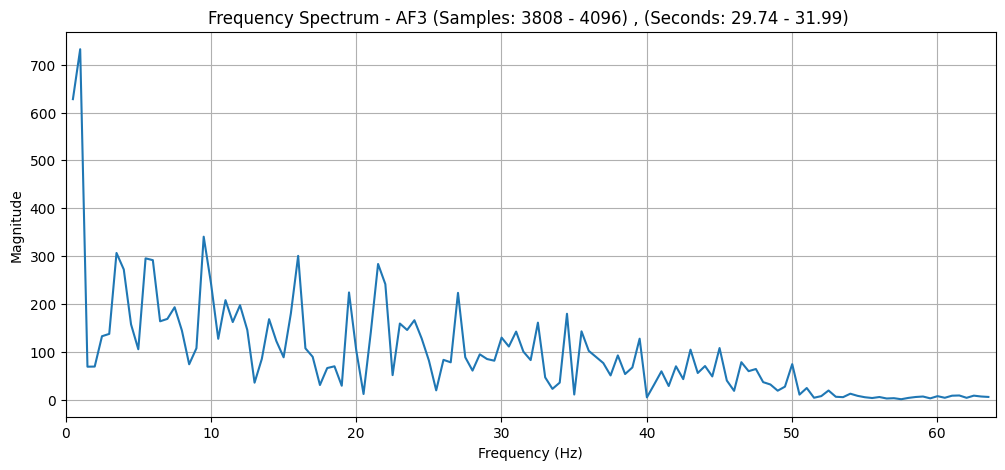

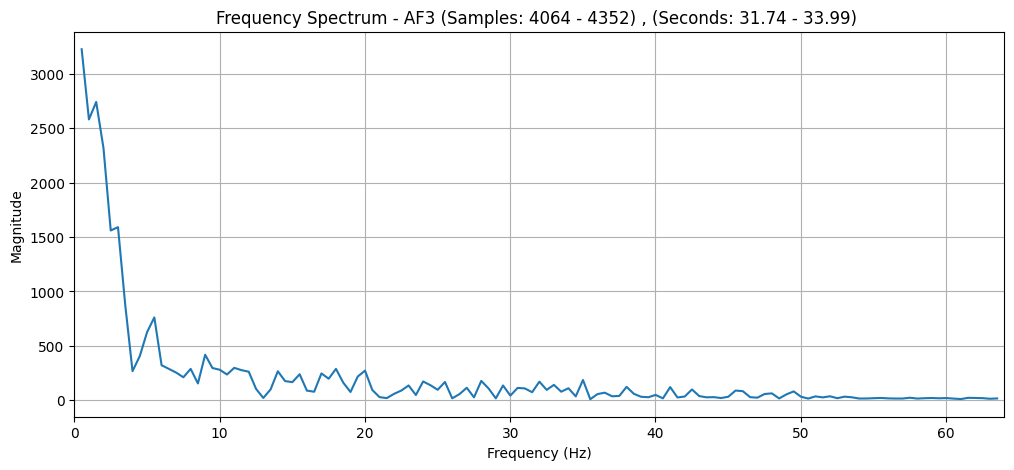

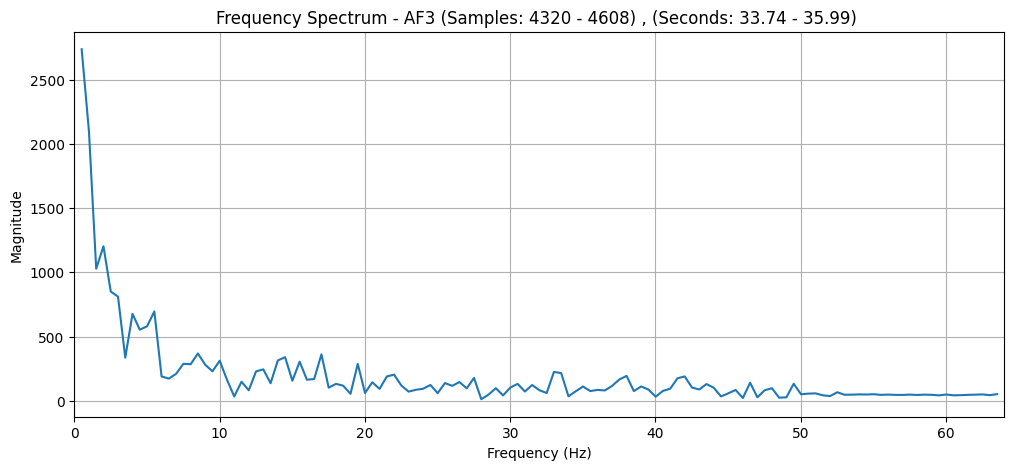

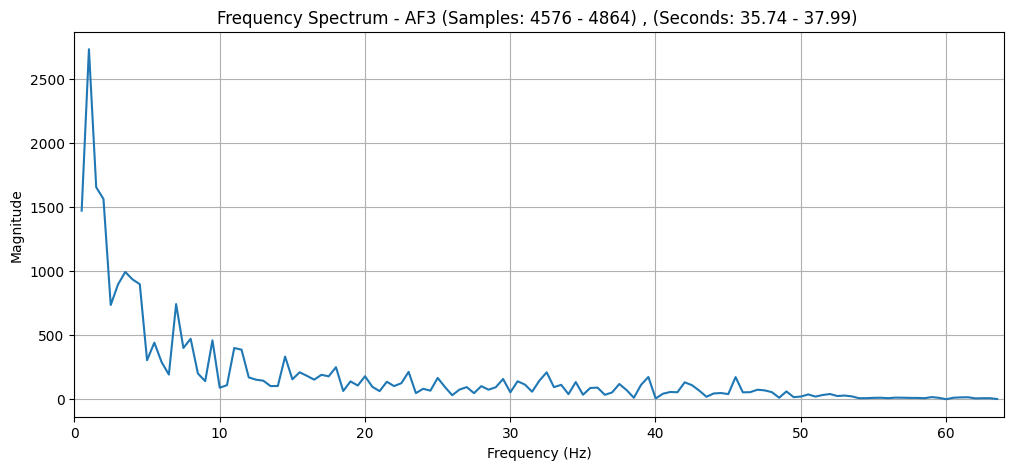

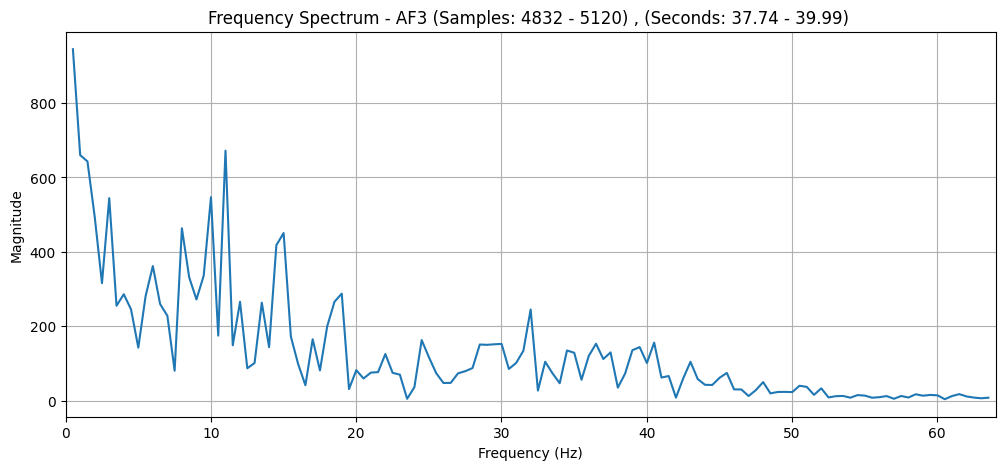

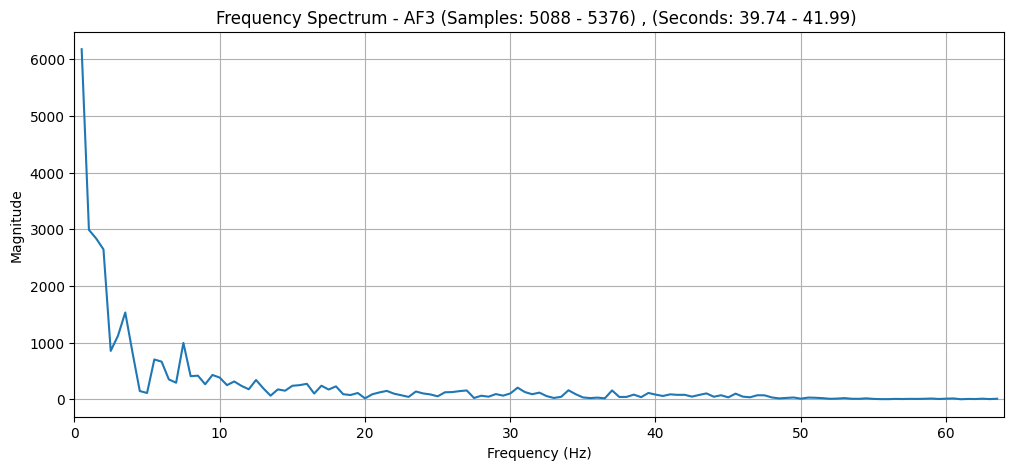

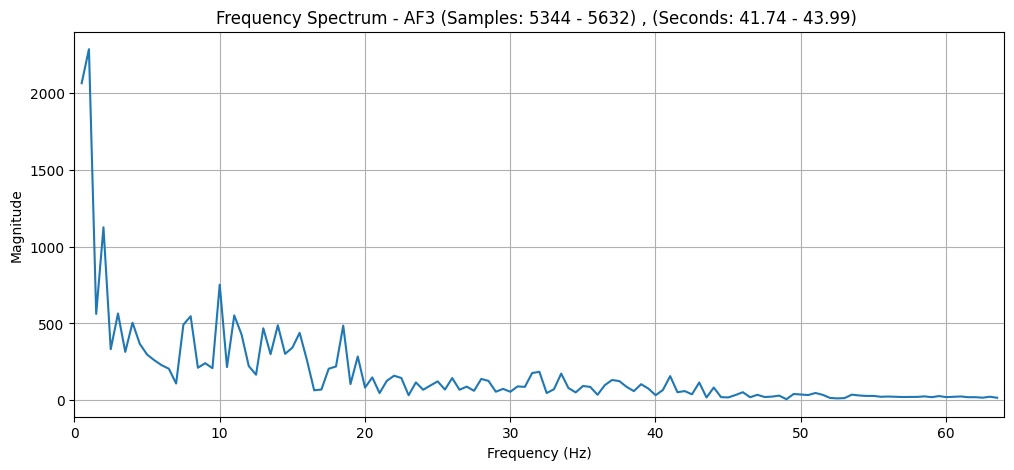

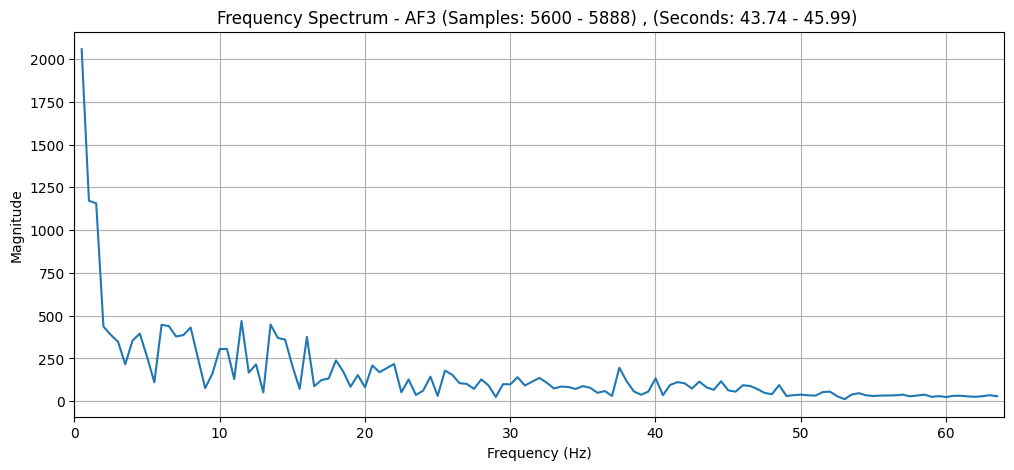

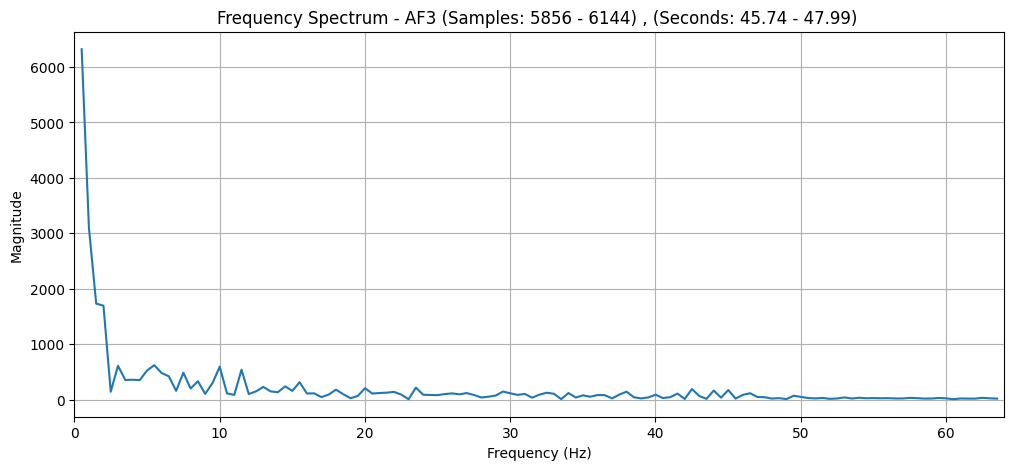

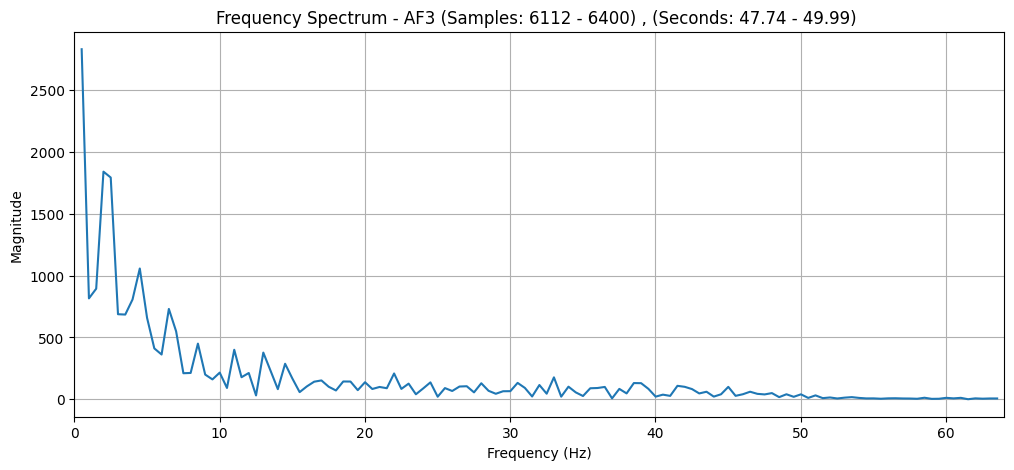

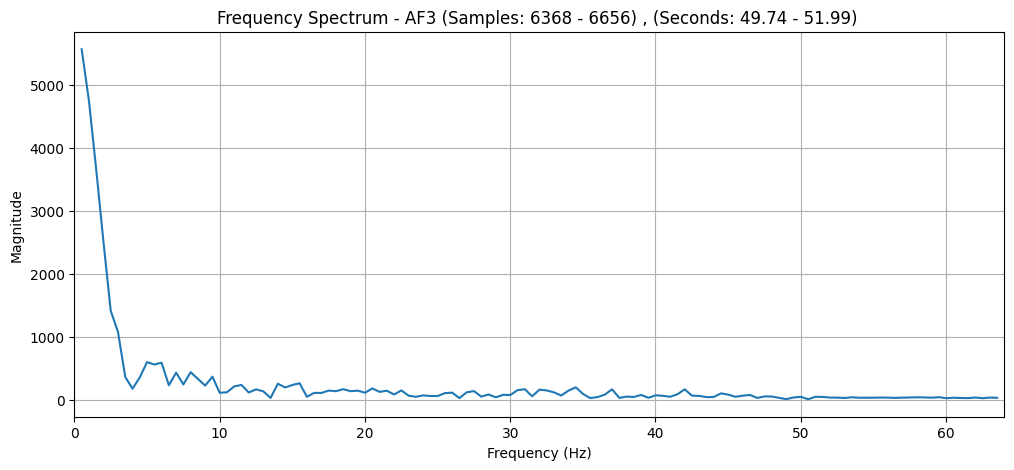

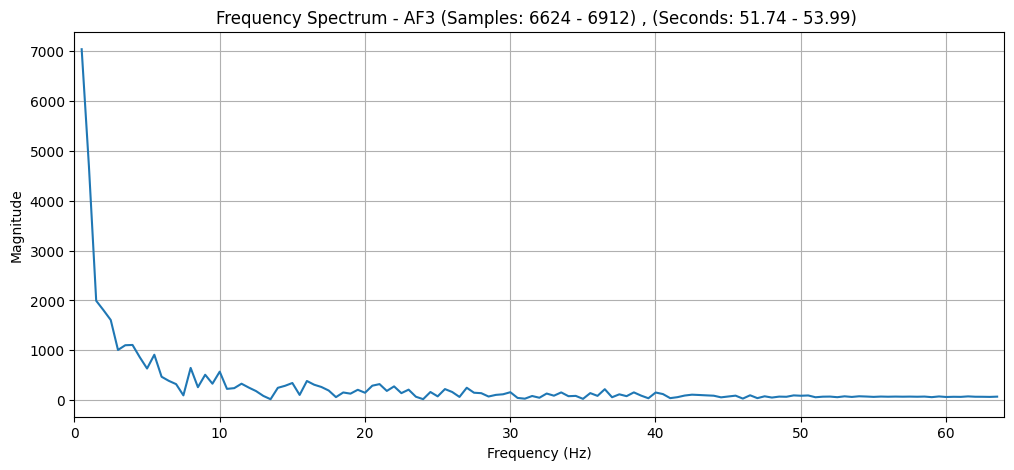

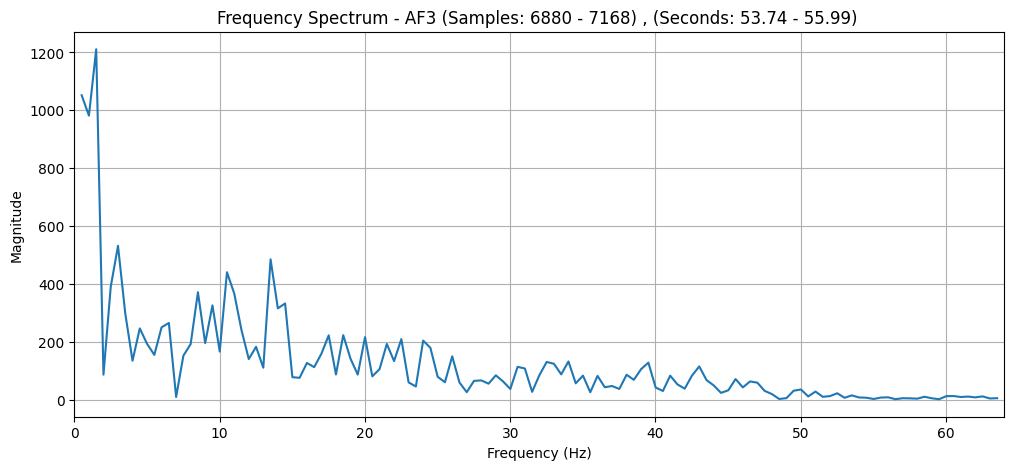

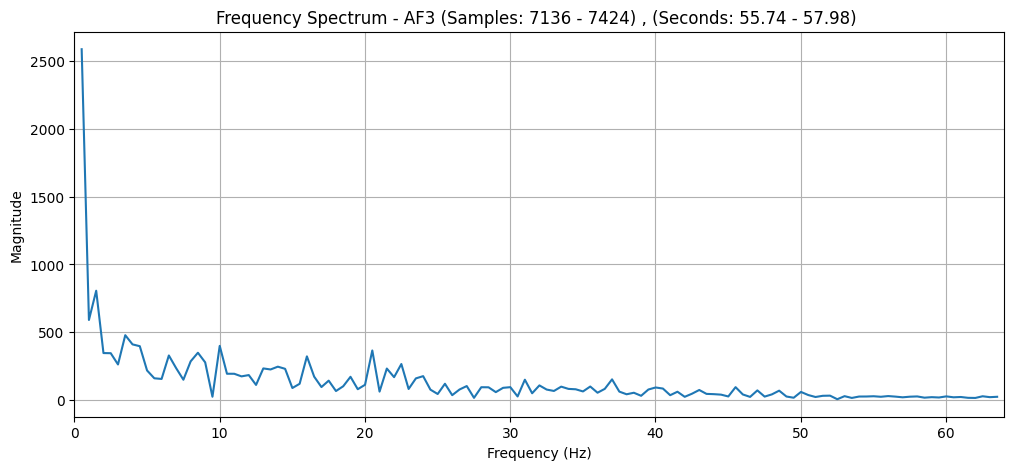

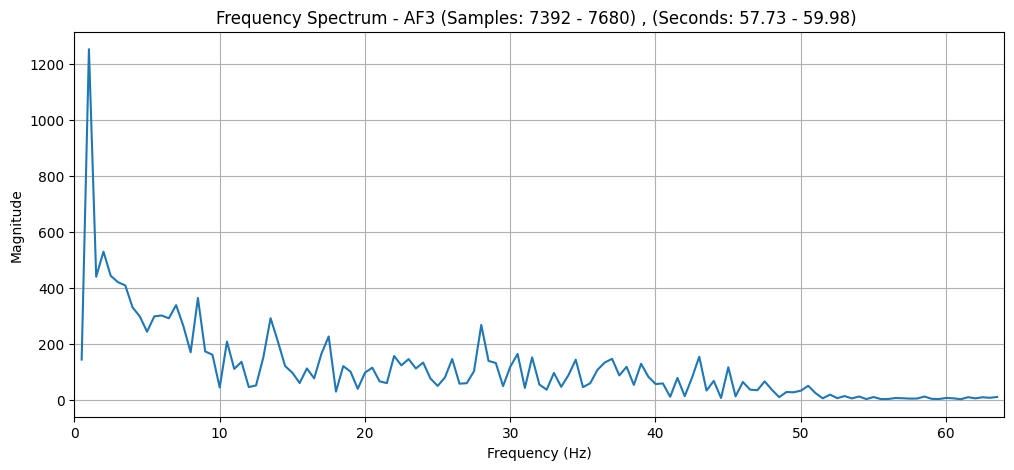

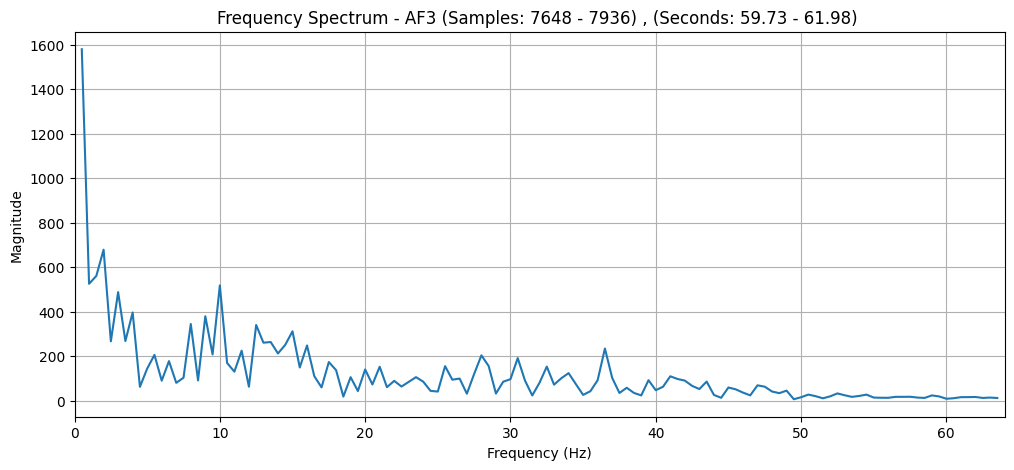

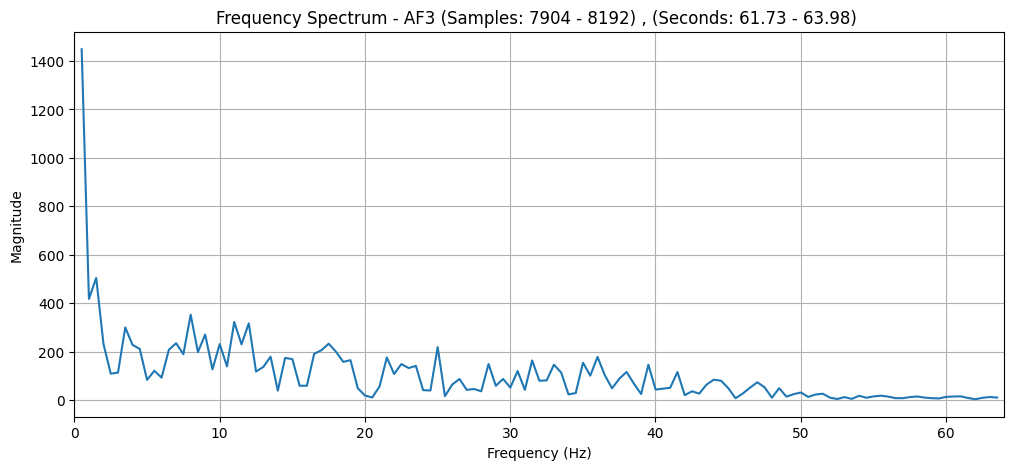

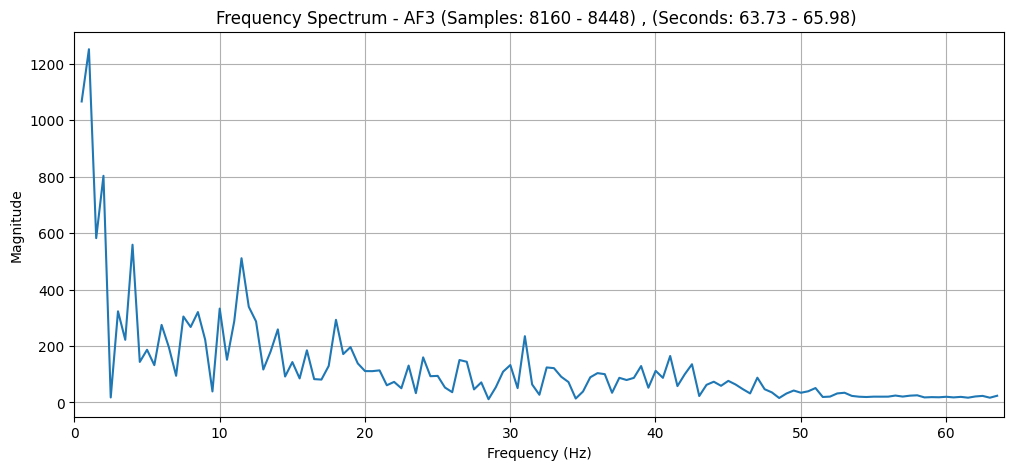

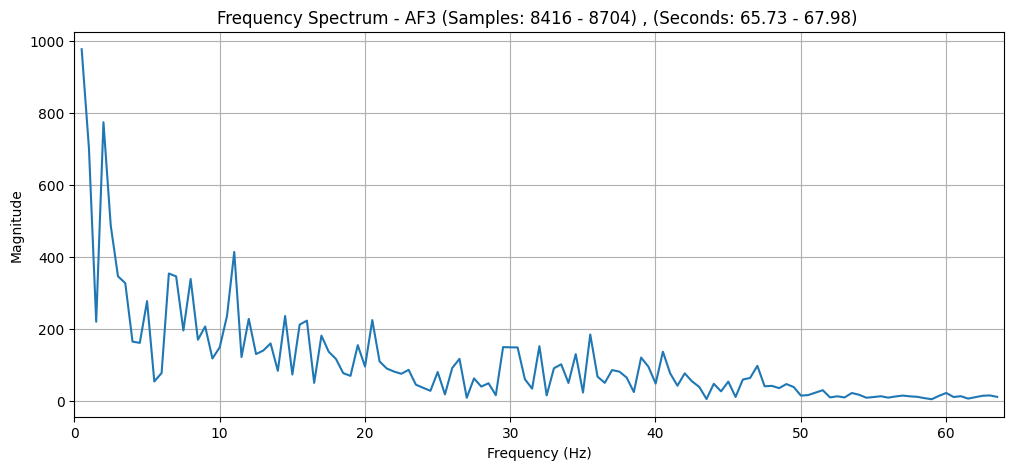

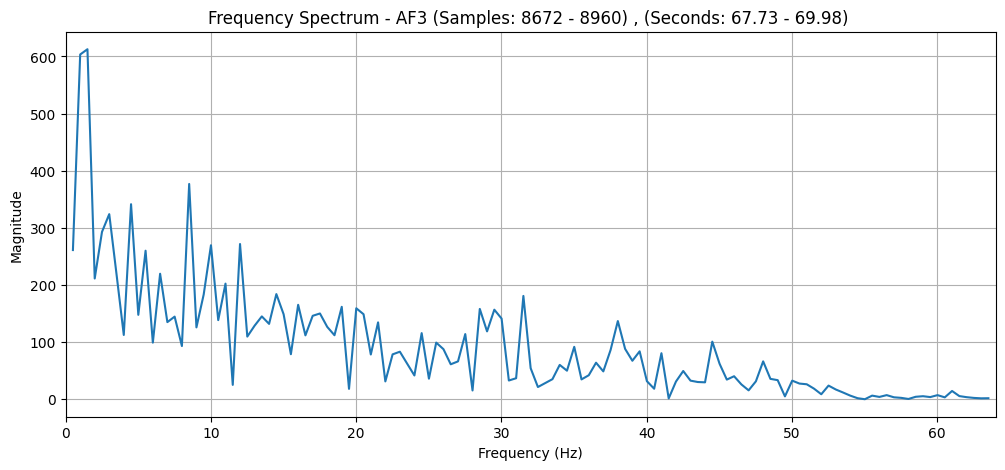

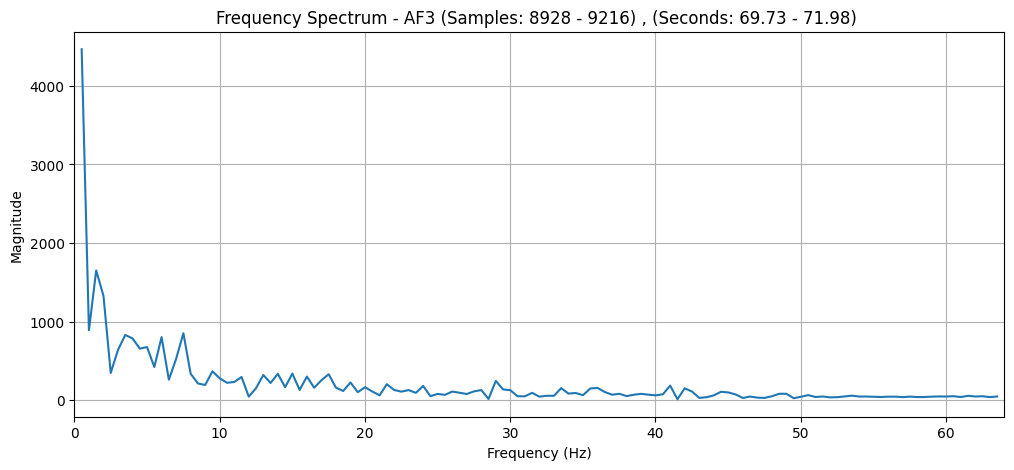

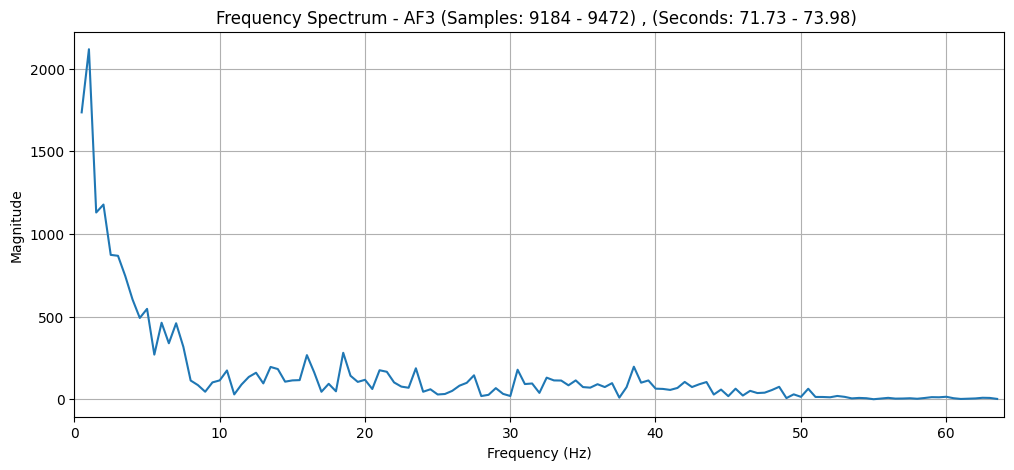

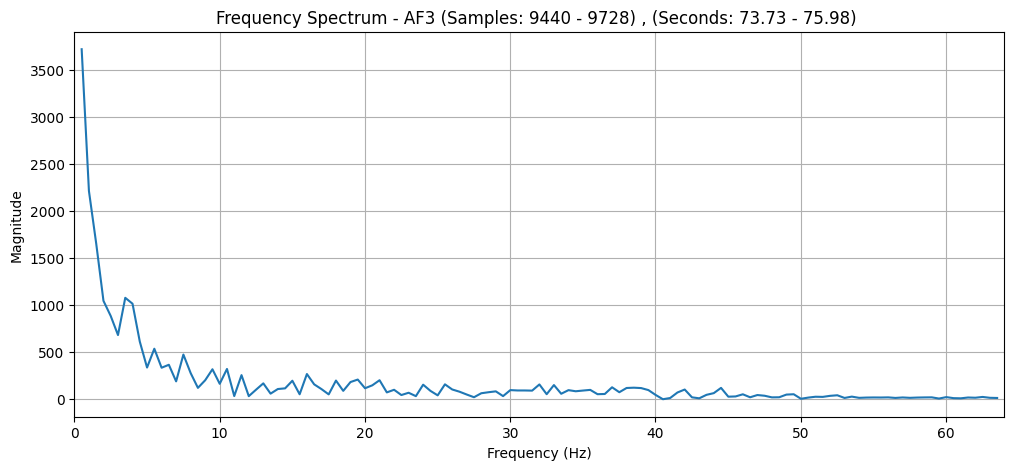

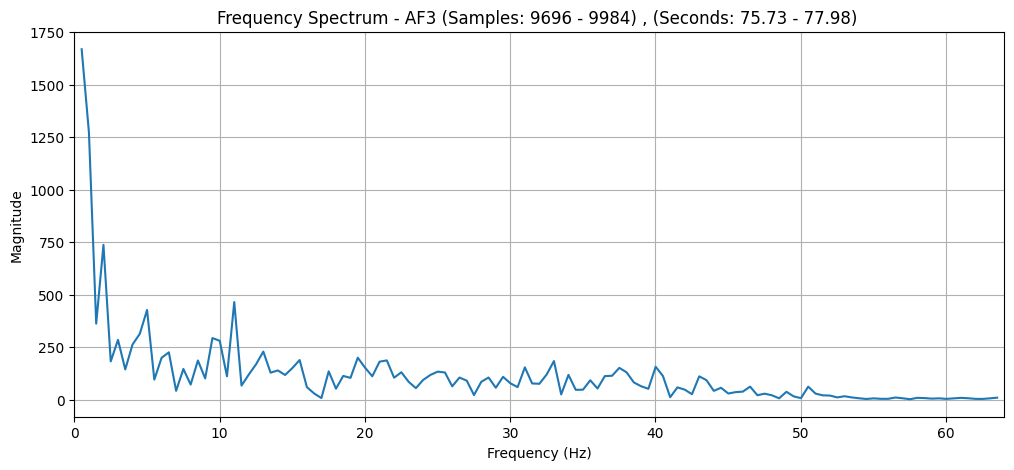

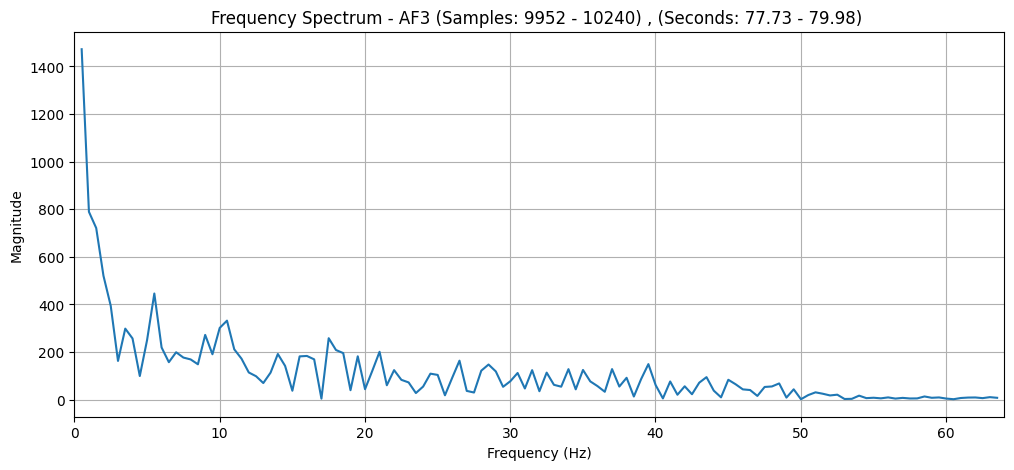

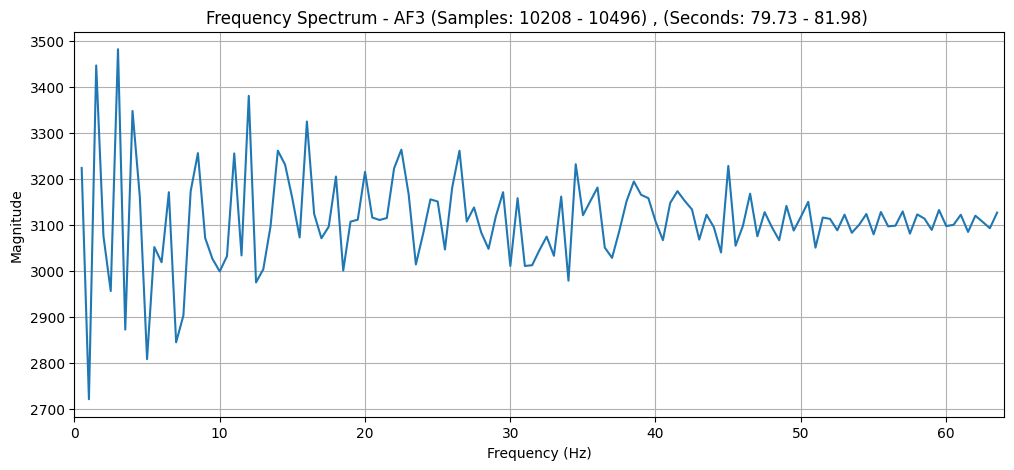

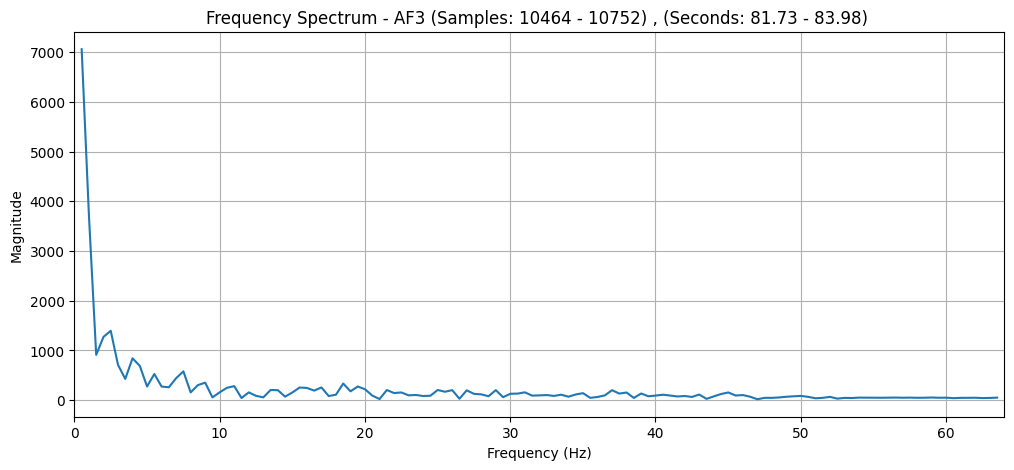

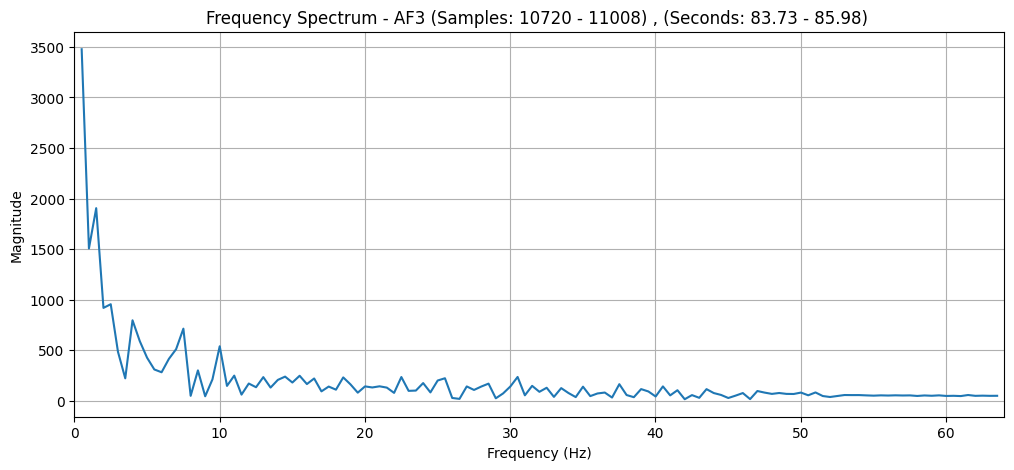

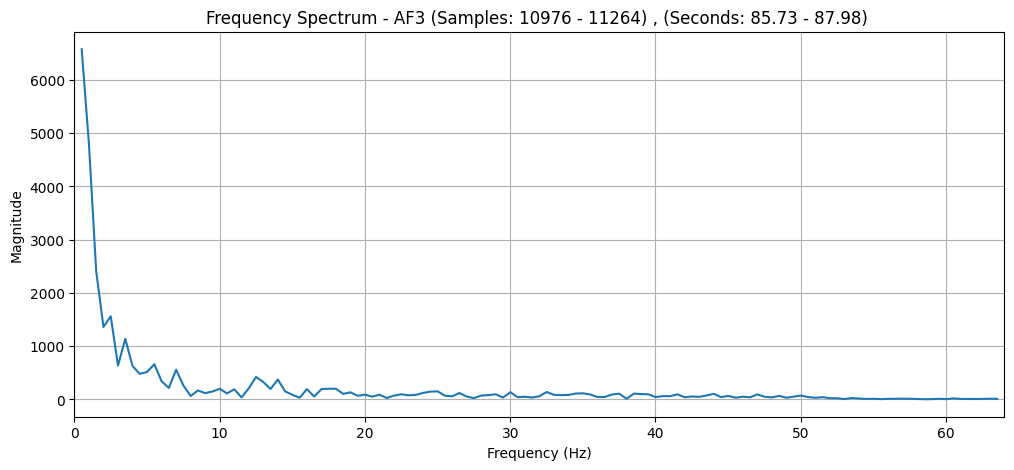

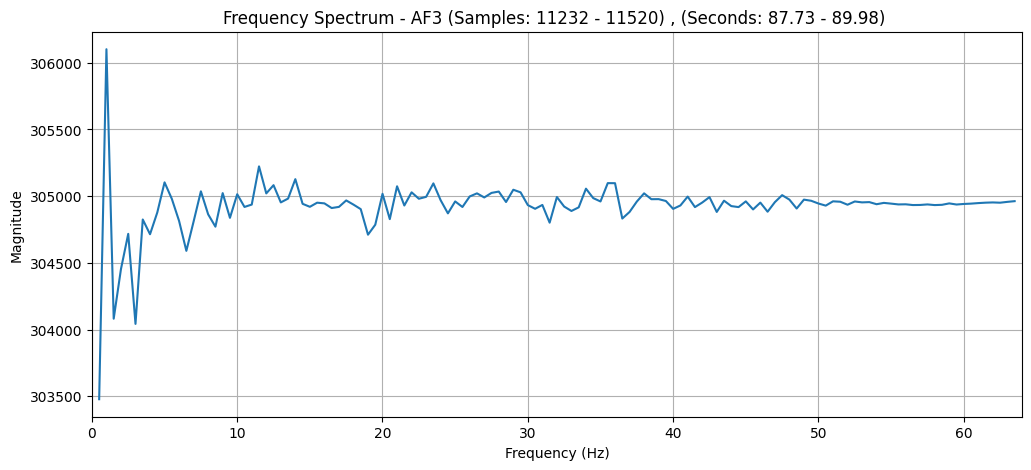

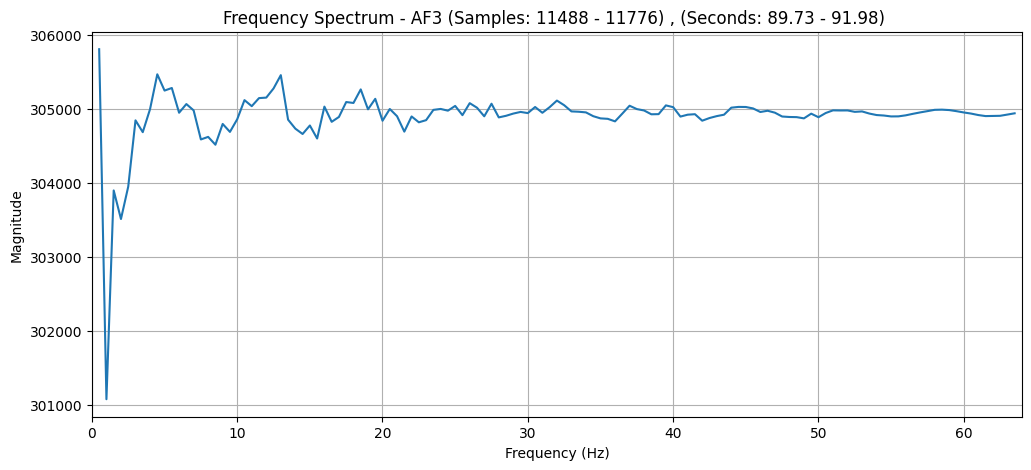

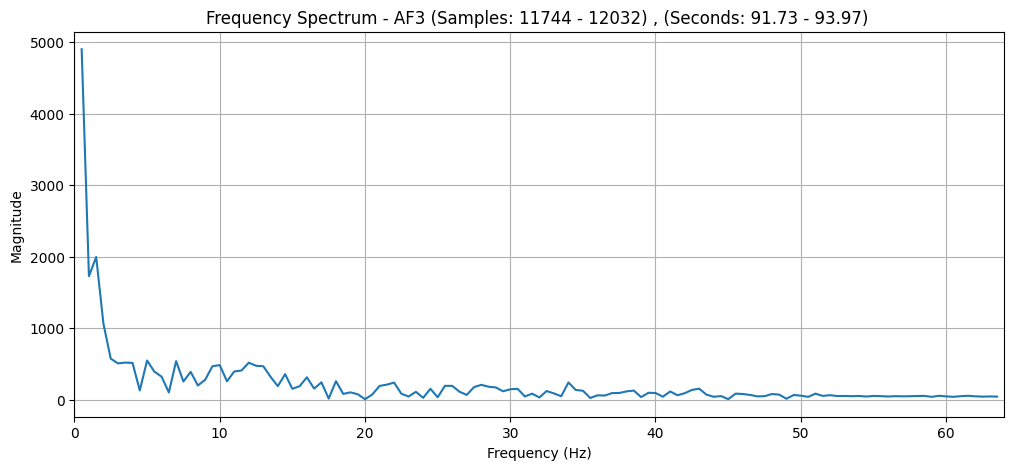

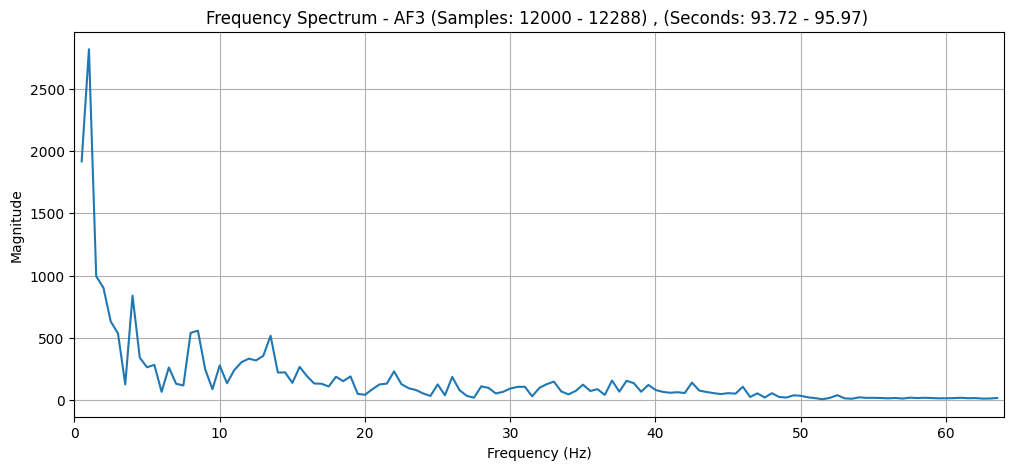

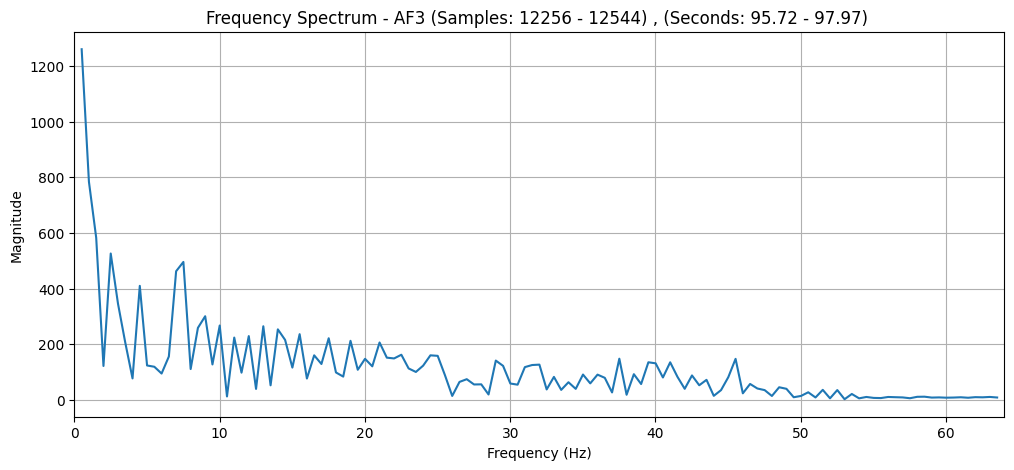

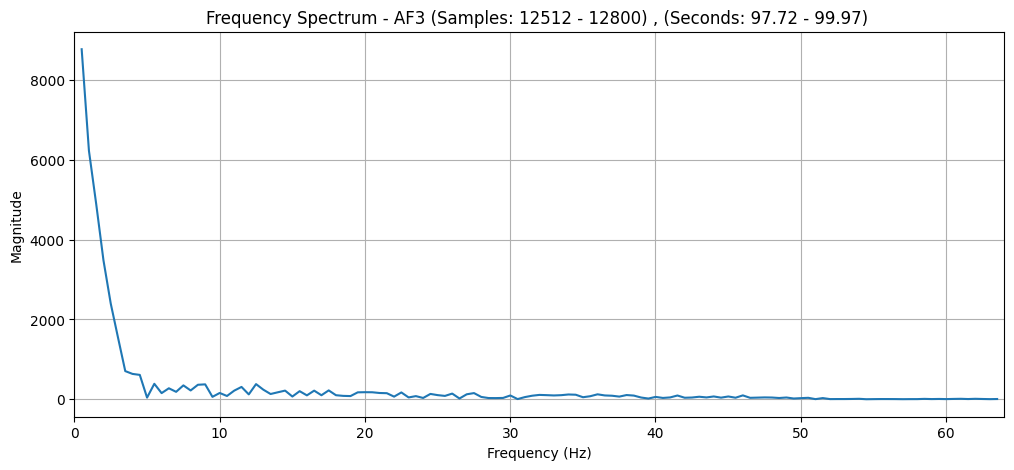

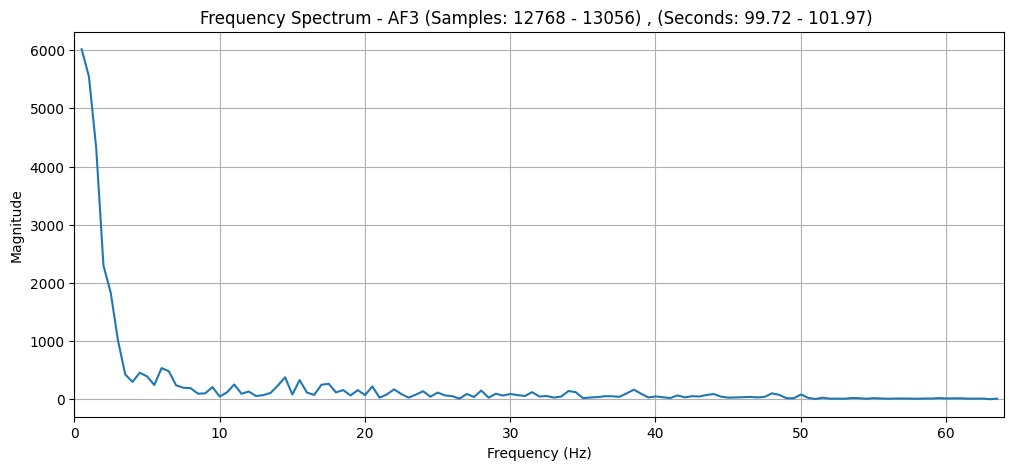

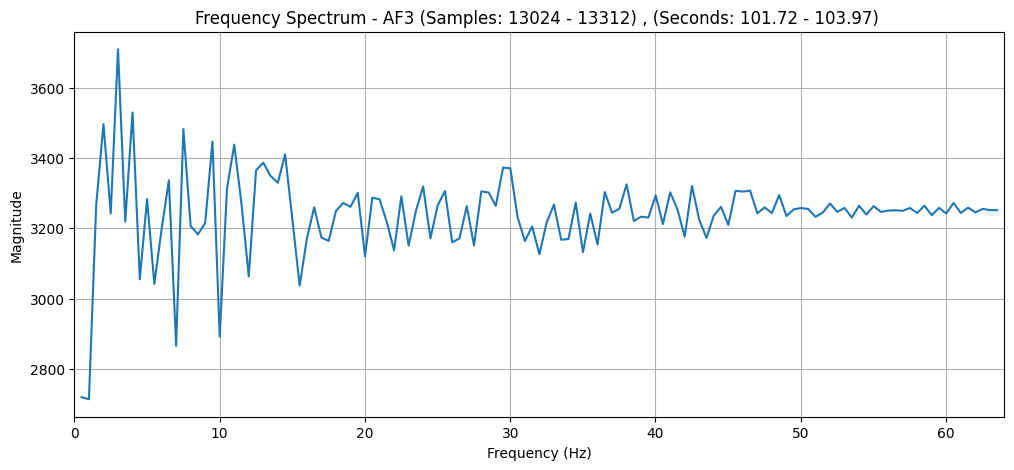

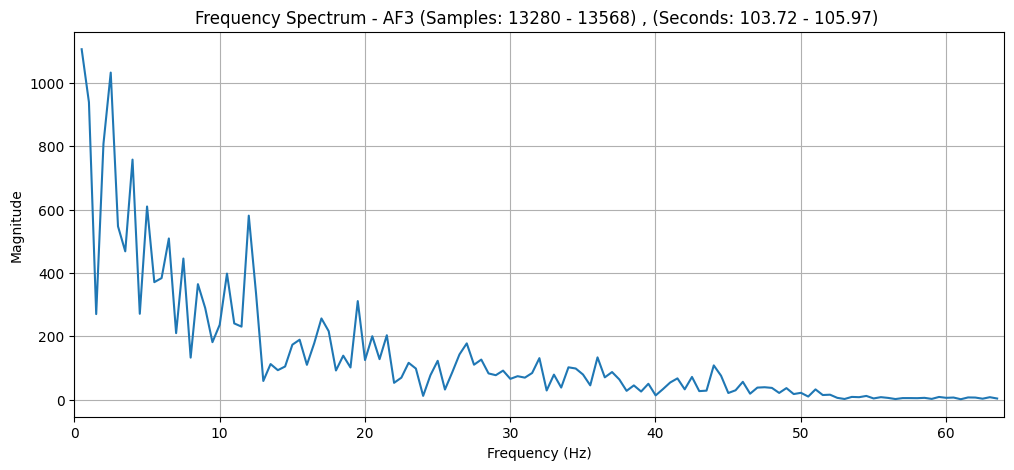

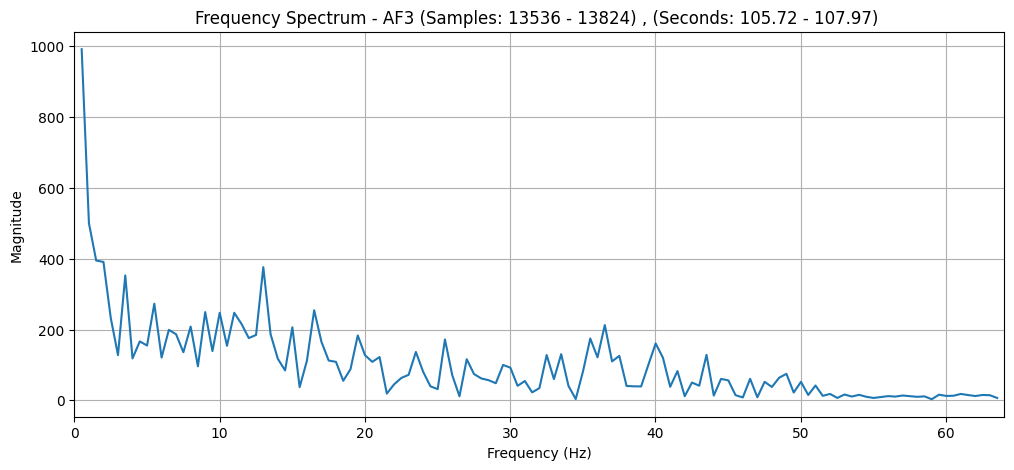

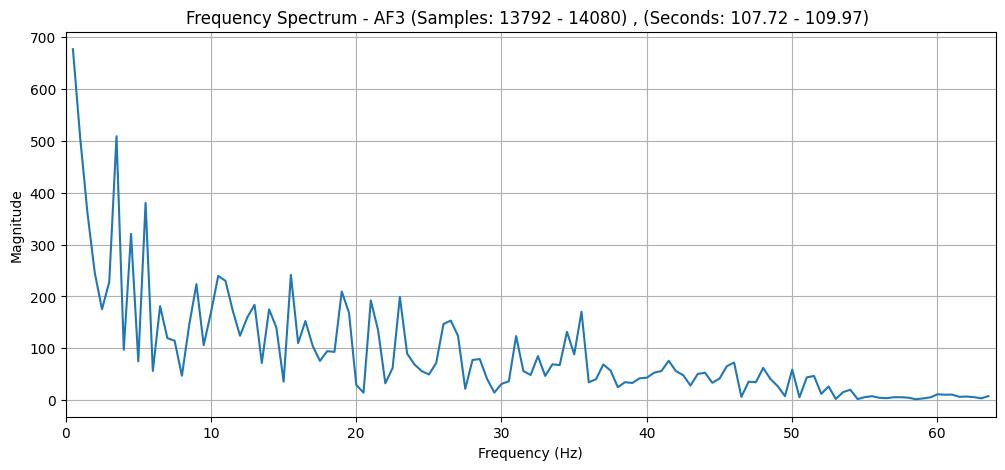

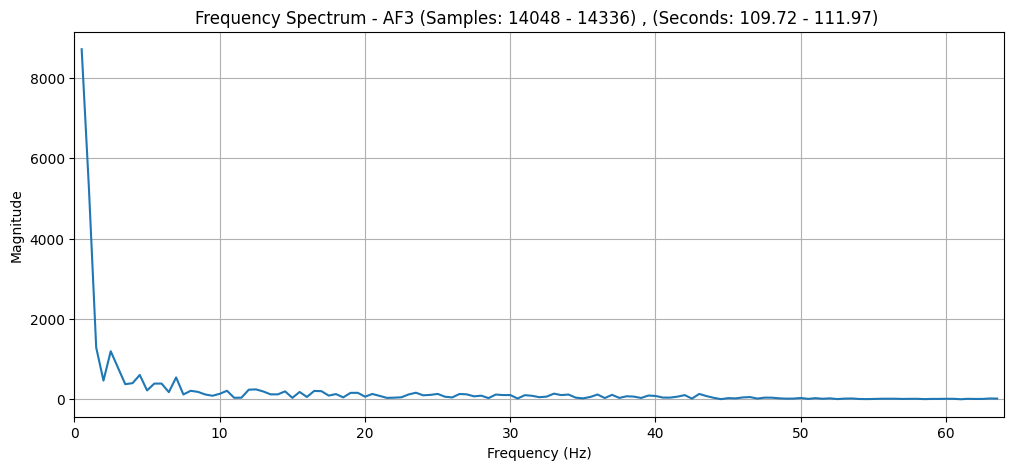

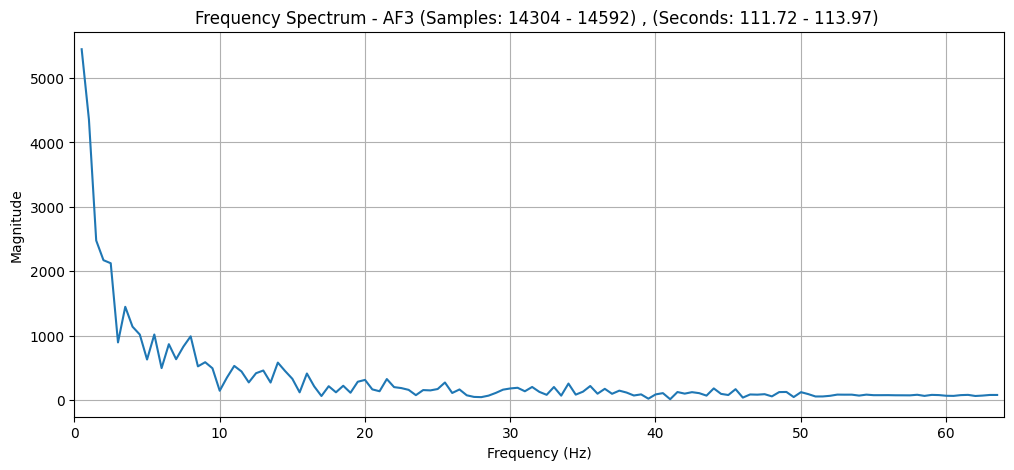

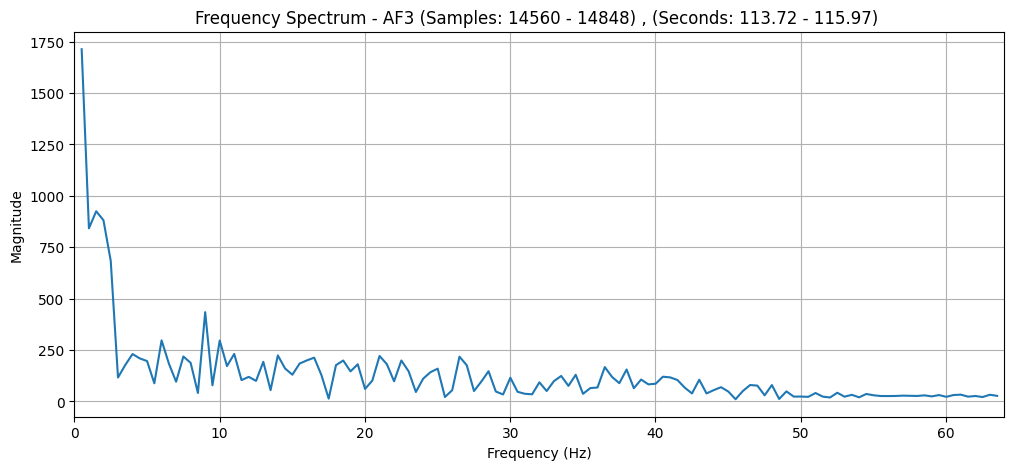

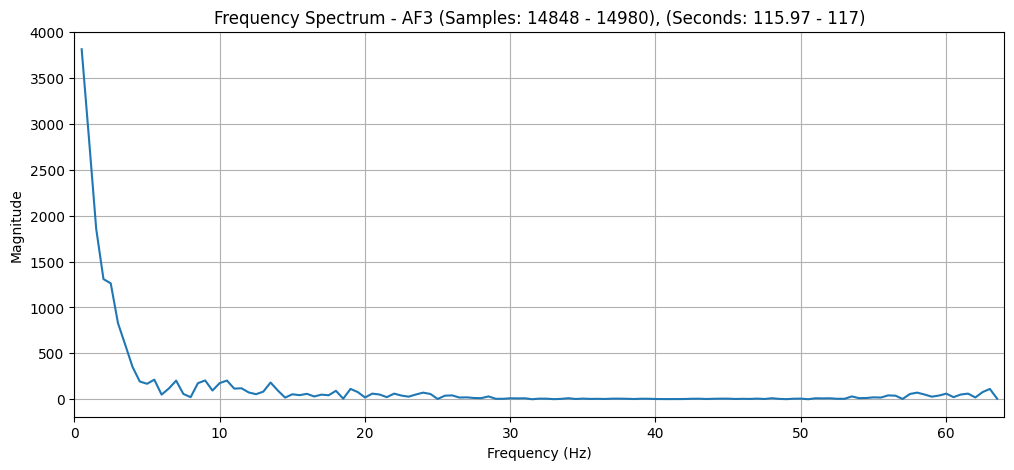

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("EEG_Eye_State_Classification.csv")

# Define the number of samples and duration
num_samples = 14980
total_duration = 117  # seconds
sample_rate = num_samples / total_duration  # Samples per second (Hz)

duration_to_analyze = 2 
samples_window = int(sample_rate * duration_to_analyze)

# Calculate the frequency bins
frequencies = np.fft.fftfreq(samples_window, d=1/sample_rate) # Get the corresponding frequencies for the FFT result 
feature_name = data.columns[0]

for i in range(0, (num_samples - samples_window) + (samples_window // 2), samples_window): 
    plt.figure(figsize=(12, 5))
    if i == 0: # for the first plot
        signal = data[feature_name][i:i + samples_window]
    elif i + samples_window > num_samples:  # for the last plot
        signal = data[feature_name][i - (samples_window // 8):num_samples] # alliasing of 32 samples (256/4 = 32) or (2/8 = 0.25 seconds) 
    else:
        signal = data[feature_name][i - (samples_window // 8):i + samples_window]  # alliasing of 32 samples (256/4 = 32) or (2/8 = 0.25 seconds) 

    
    # Perform FFT and get the magnitude
    fft_output = np.fft.fft(signal)
    fft_magnitude = np.abs(fft_output)
    
    # Create a subplot for each feature
    plt.plot(frequencies[1:samples_window // 2], fft_magnitude[1:samples_window // 2])  # Plot only positive frequencies

    if i == 0:
        plt.title(f"Frequency Spectrum - {feature_name} (Samples: {i} - {i + samples_window}) , (Seconds: 0 - {duration_to_analyze})")
    elif i + samples_window < num_samples:  
        plt.title(f"Frequency Spectrum - {feature_name} (Samples: {i - (samples_window // 8)} - {i + samples_window}) , (Seconds: {((i - (samples_window // 8)) / sample_rate):.2f} - {((i + samples_window) / sample_rate):.2f}) ")
    else: # fix the last title 
        plt.title(f"Frequency Spectrum - {feature_name} (Samples: {i} - {num_samples}), (Seconds: {(i / sample_rate):.2f} - {total_duration})")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.xlim(0, sample_rate / 2)  # Limit x-axis to Nyquist frequency
    plt.grid(True)  
    plt.show()


In [33]:
print(f"i = {i}")
print(f"num of samples: {num_samples}")
print(f"sampling window size: {samples_window}")
print(f"last sample: {num_samples - samples_window}")

i = 14848
num of samples: 14980
sampling window size: 256
last sample: 14724


In [35]:
len(data[feature_name])

14980

In [49]:
signal = data[feature_name][i - (samples_window // 8):num_samples]
print(signal)

14816    4282.56
14817    4283.08
14818    4278.97
14819    4279.49
14820    4282.56
          ...   
14975    4281.03
14976    4276.92
14977    4277.44
14978    4284.62
14979    4287.69
Name: AF3, Length: 164, dtype: float64
